In [14]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from tqdm import tqdm
import joblib
import matplotlib.pyplot as plt

In [10]:
dark_img = cv2.imread('../dataset/abnormal/dark.jpg')

In [11]:
gray = cv2.cvtColor(dark_img, cv2.COLOR_BGR2GRAY)

In [12]:
equalized = cv2.equalizeHist(gray)

In [17]:
# 创建一个2x2的图像布局
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 在第一个子图中显示原始图像
axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')

# 在第二个子图中显示均衡化后的图像
axs[1].imshow(equalized, cmap='gray')
axs[1].set_title('Equalized')

# 调整子图之间的间距
plt.tight_layout()

# 保存图像
plt.savefig('../result/comparison.png')

# 显示图像
plt.show()

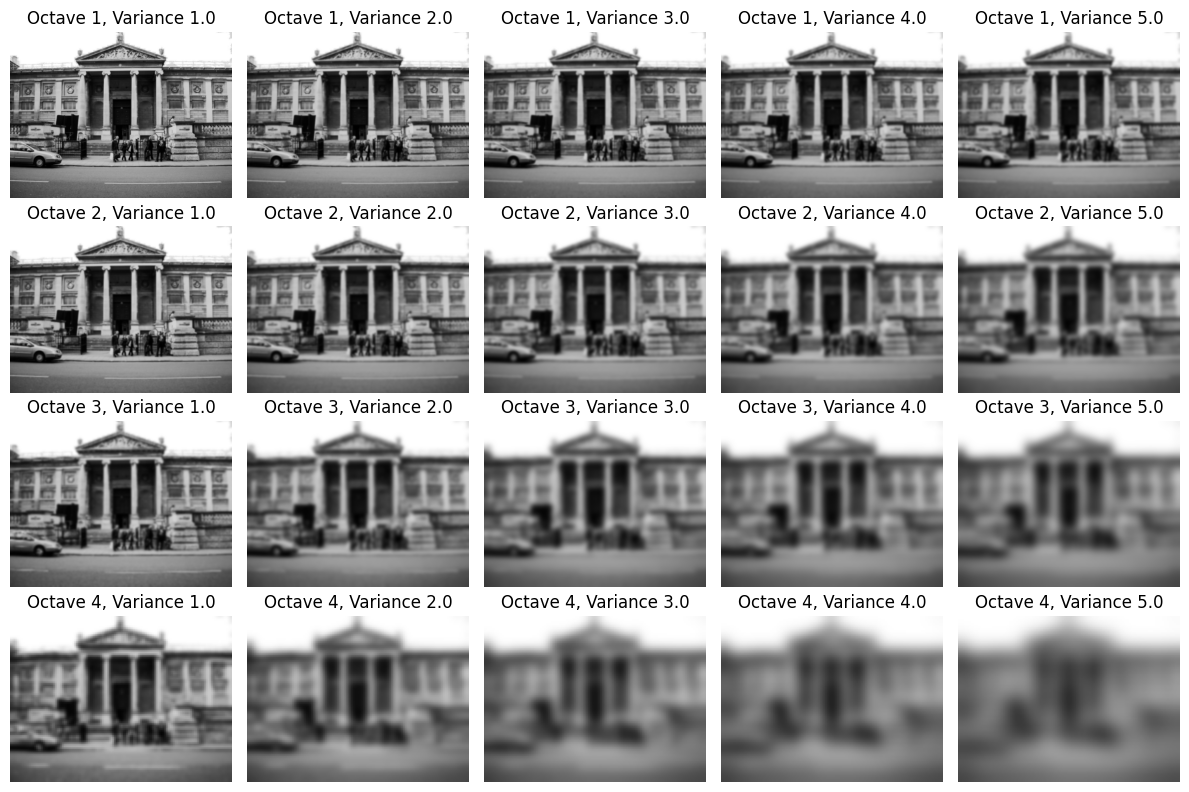

In [36]:
# 读取图像
image = cv2.imread('../query/target.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.equalizeHist(image)

# 定义Octave数量和高斯滤波方差值
octaves = 4
variances = [1.0, 2.0, 3.0, 4.0, 5.0]

# 创建画布和子图
fig, axs = plt.subplots(octaves, len(variances), figsize=(12, 8))

# 对每个Octave和高斯滤波方差值进行处理
for octave in range(octaves):
    for i, variance in enumerate(variances):
        # 计算当前Octave的缩放因子
        scale_factor = 2 ** octave

        # 降采样图像
        downscaled_image = cv2.resize(image, None, fx=1/scale_factor, fy=1/scale_factor)

        # 高斯模糊
        blurred_image = cv2.GaussianBlur(downscaled_image, (0, 0), variance)

        # 在相应的子图中显示图像
        axs[octave, i].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
        axs[octave, i].set_title(f'Octave {octave+1}, Variance {variance}')
        axs[octave, i].axis('off')

# 调整子图之间的间距
plt.tight_layout()

plt.savefig('../result/octave_variance_comparison.png')

# 显示图像
plt.show()


In [51]:
# 读取图像
image = cv2.imread('../query/target.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.equalizeHist(image)

# 定义Octave数量和高斯滤波方差值
octaves = 1
variances = [1.0, 2.0, 3.0, 4.0, 5.0]

# 创建画布和子图
fig, axs = plt.subplots(octaves, len(variances)-1, figsize=(12, 2))

# 对每个方差值进行处理
for i, variance in enumerate(variances[:-1]):
    # 高斯差分
    blurred_1 = cv2.GaussianBlur(image, (0, 0), variances[i])
    blurred_2 = cv2.GaussianBlur(image, (0, 0), variances[i+1])
    difference = blurred_1 - blurred_2

    # 在相应的子图中显示图像
    axs[i].imshow(cv2.cvtColor(difference, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Variance {variances[i+1]} - {variances[i]}')
    axs[i].axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 保存图像
plt.savefig('../result/octave_gaussian_difference.png')

# 显示图像
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, K, max_iters=100):
    centroids = X[np.random.choice(range(len(X)), K, replace=False)]
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=-1)
        # Update centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Generate some random data for clustering
np.random.seed(0)
X1 = np.random.randn(100, 2) + np.array([5, 5])
X2 = np.random.randn(100, 2) + np.array([-5, 5])
X3 = np.random.randn(100, 2) + np.array([0, -5])
X = np.concatenate([X1, X2, X3])

# Perform K-means clustering
K = 3
labels, centroids = kmeans(X, K)

# Visualize the data points and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100)
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('../result/KMeans_example.png')

plt.show()
